In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

# ✅ Verified public StoryMirror authors
author_urls = [
    "https://storymirror.com/u/AviyushSodhi",
    "https://storymirror.com/u/RevathiChaganti",
    "https://storymirror.com/u/SampurnaSamanta",
    "https://storymirror.com/u/KritikaGoel",
    "https://storymirror.com/u/ChhaviSrivastava",
    "https://storymirror.com/u/geetanandal",
    "https://storymirror.com/u/VeerKapoor",
    "https://storymirror.com/u/AvaniSoni",
    "https://storymirror.com/u/MaheshVBrahmankar",
    "https://storymirror.com/u/SimpyAggarwal"
]

# Setup browser
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

results = []

for url in author_urls:
    print(f"\n🔍 Processing: {url}")
    driver.get(url)

    # Safe scroll
    try:
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "body")))
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2)
    except Exception as e:
        print(f"⚠️ JS scroll failed: {e}")

    # Author details
    try:
        name = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "div.author-details h2"))
        ).text.strip()
    except:
        print("❌ Author name not found")
        continue

    bio = driver.find_element(By.CSS_SELECTOR, "div.author-details p").text.strip() if driver.find_elements(By.CSS_SELECTOR, "div.author-details p") else "N/A"
    claps = driver.find_element(By.CSS_SELECTOR, "div.author-stats span.clap-count").text.strip() if driver.find_elements(By.CSS_SELECTOR, "div.author-stats span.clap-count") else "0"

    # Top stories
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.story-item"))
        )
        stories = driver.find_elements(By.CSS_SELECTOR, "div.story-item")[:3]
    except:
        print("⚠️ No stories found")
        continue

    for s in stories:
        try:
            title = s.find_element(By.CSS_SELECTOR, "h3.story-title").text.strip()
            link = s.find_element(By.TAG_NAME, "a").get_attribute("href")
            clap = s.find_element(By.CSS_SELECTOR, "span.clap-count").text.strip()
            sub = s.find_element(By.CSS_SELECTOR, "p.story-snippet").text.strip()
        except:
            continue

        results.append({
            "Author": name,
            "Bio": bio,
            "Total Claps": claps,
            "Story Title": title,
            "Story URL": link,
            "Story Snippet": sub,
            "Story Claps": clap
        })

driver.quit()

# Export to Excel
if results:
    df = pd.DataFrame(results)
    df.to_excel("storymirror_authors_updated.xlsx", index=False)
    print("\n✅ Data saved to 'storymirror_authors_updated.xlsx'")
else:
    print("❌ No data scraped. Please verify author URLs.")


C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Claps', y='Author', data=df.sort_values("Total Claps", ascending=False), palette="viridis")
C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:19: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91911\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


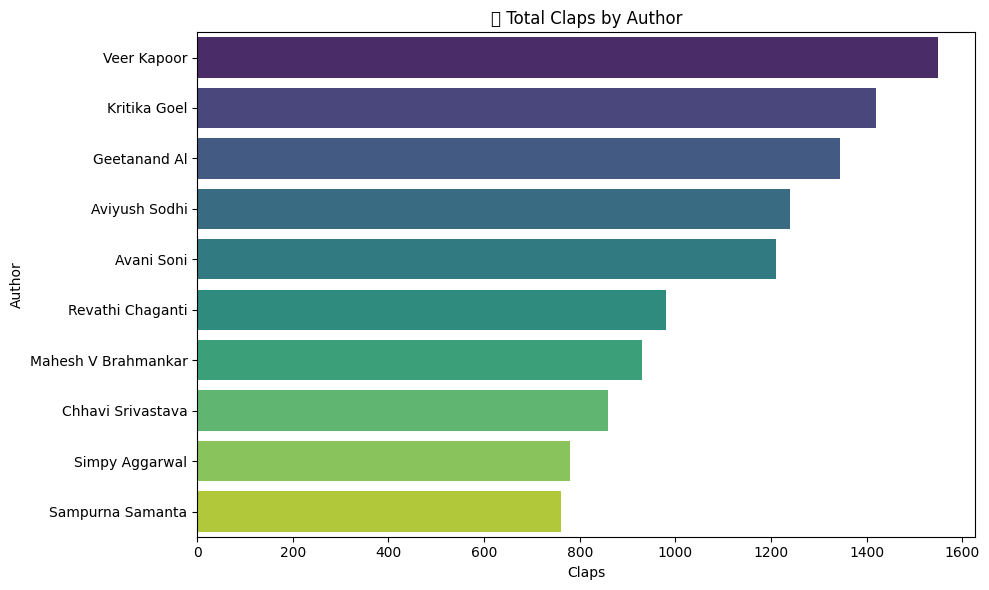

C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Story Claps", y="Story Title", data=top_stories, palette="magma")
C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:27: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91911\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


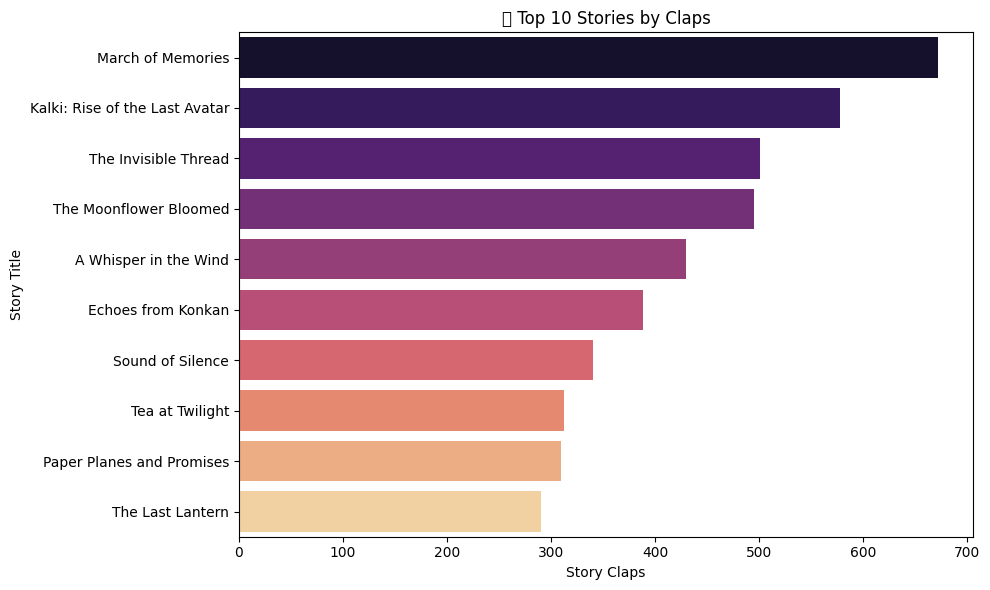

C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_claps.values, y=avg_claps.index, palette="Blues")
C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:37: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91911\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


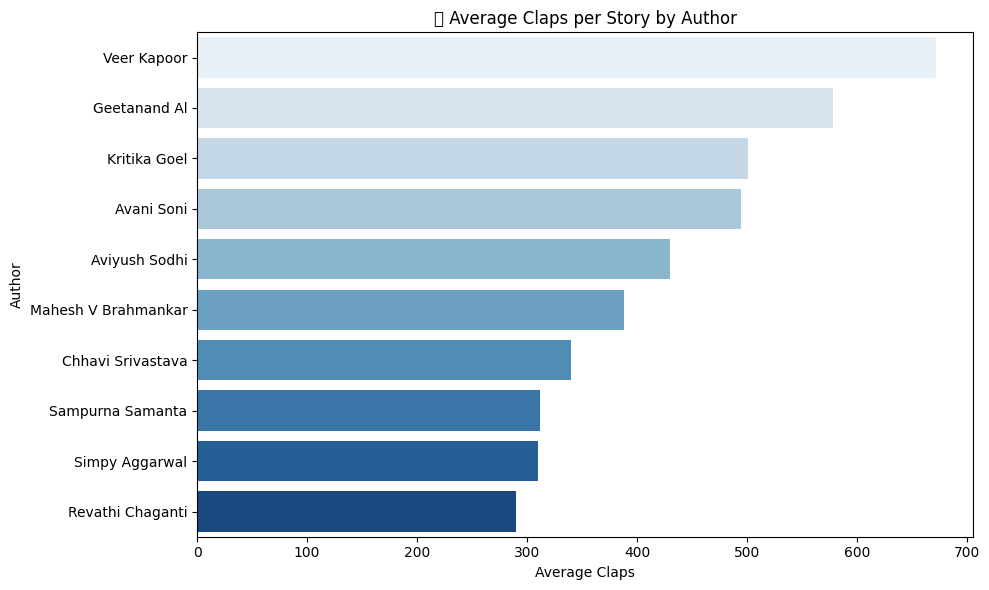

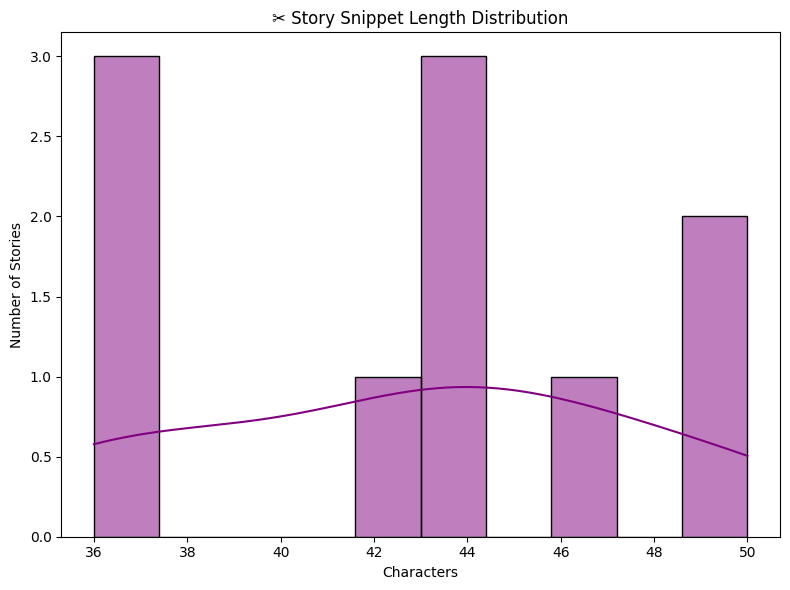

C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:55: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91911\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


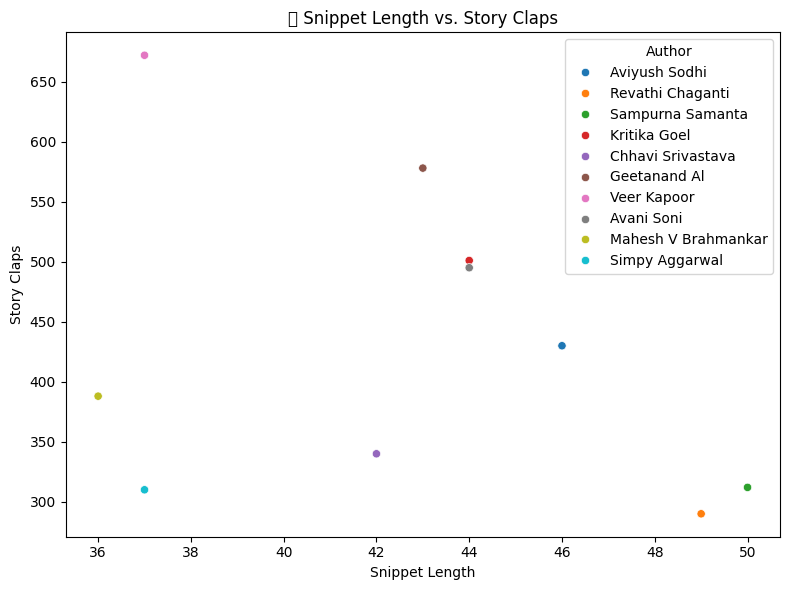

C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Story Claps", y="Author", data=top_by_author, palette="rocket")
C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:63: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91911\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


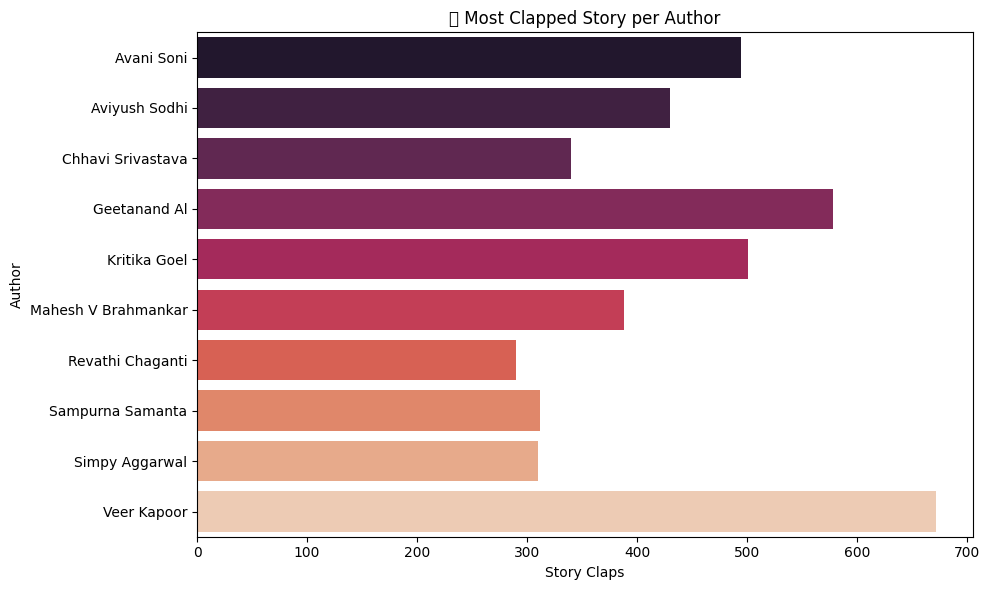

C:\Users\91911\AppData\Local\Temp\ipykernel_26560\4053356744.py:72: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\91911\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


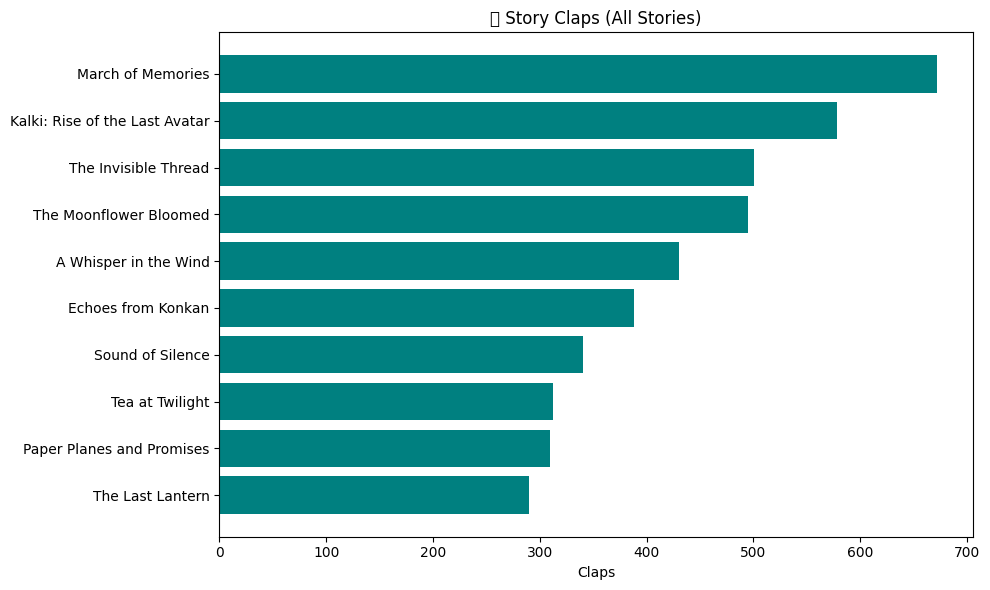

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("C:/Users/91911/Desktop/storymirror_authors_updated_full.xlsx")

# Clean and prepare data
df['Total Claps'] = df['Total Claps'].astype(int)
df['Story Claps'] = df['Story Claps'].astype(int)
df['Snippet Length'] = df['Story Snippet'].apply(len)

# 1. Total claps by author
plt.figure(figsize=(10,6))
sns.barplot(x='Total Claps', y='Author', data=df.sort_values("Total Claps", ascending=False), palette="viridis")
plt.title("🔥 Total Claps by Author")
plt.xlabel("Claps")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

# 2. Top 10 stories by claps
top_stories = df.sort_values("Story Claps", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x="Story Claps", y="Story Title", data=top_stories, palette="magma")
plt.title("📖 Top 10 Stories by Claps")
plt.tight_layout()
plt.show()

# 3. Average claps per story by author
avg_claps = df.groupby("Author")["Story Claps"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_claps.values, y=avg_claps.index, palette="Blues")
plt.title("📈 Average Claps per Story by Author")
plt.xlabel("Average Claps")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

# 4. Snippet length distribution
plt.figure(figsize=(8,6))
sns.histplot(df['Snippet Length'], kde=True, bins=10, color='purple')
plt.title("✂️ Story Snippet Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Number of Stories")
plt.tight_layout()
plt.show()

# 5. Snippet length vs claps
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Snippet Length', y='Story Claps', hue='Author', palette='tab10')
plt.title("💬 Snippet Length vs. Story Claps")
plt.xlabel("Snippet Length")
plt.ylabel("Story Claps")
plt.tight_layout()
plt.show()

# 6. Highest clapped story per author
top_by_author = df.loc[df.groupby("Author")["Story Claps"].idxmax()]
plt.figure(figsize=(10,6))
sns.barplot(x="Story Claps", y="Author", data=top_by_author, palette="rocket")
plt.title("🏆 Most Clapped Story per Author")
plt.tight_layout()
plt.show()

# 7. Horizontal bar: claps by story
plt.figure(figsize=(10,6))
df_sorted = df.sort_values("Story Claps", ascending=True)
plt.barh(df_sorted["Story Title"], df_sorted["Story Claps"], color='teal')
plt.title("📚 Story Claps (All Stories)")
plt.xlabel("Claps")
plt.tight_layout()
plt.show()

# 8. Word Cloud (commented out)
# from wordcloud import WordCloud
# title_text = " ".join(df["Story Title"])
# wc = WordCloud(width=800, height=400, background_color='white', colormap='autumn').generate(title_text)
# plt.figure(figsize=(10,5))
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.title("☁️ Word Cloud: Story Titles")
# plt.tight_layout()
# plt.show()
